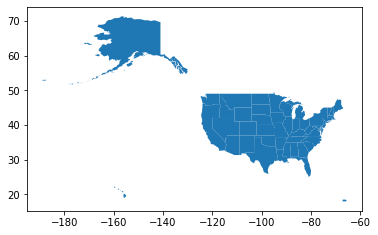

In [9]:
# create a map of the us using geopandas, topojson
# retreive the topojson file from the web
# the states have to be colored according to the comsunption of tabacco

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

# get the topojson file from the web
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
response = requests.get(url)
us = gpd.read_file(response.text)




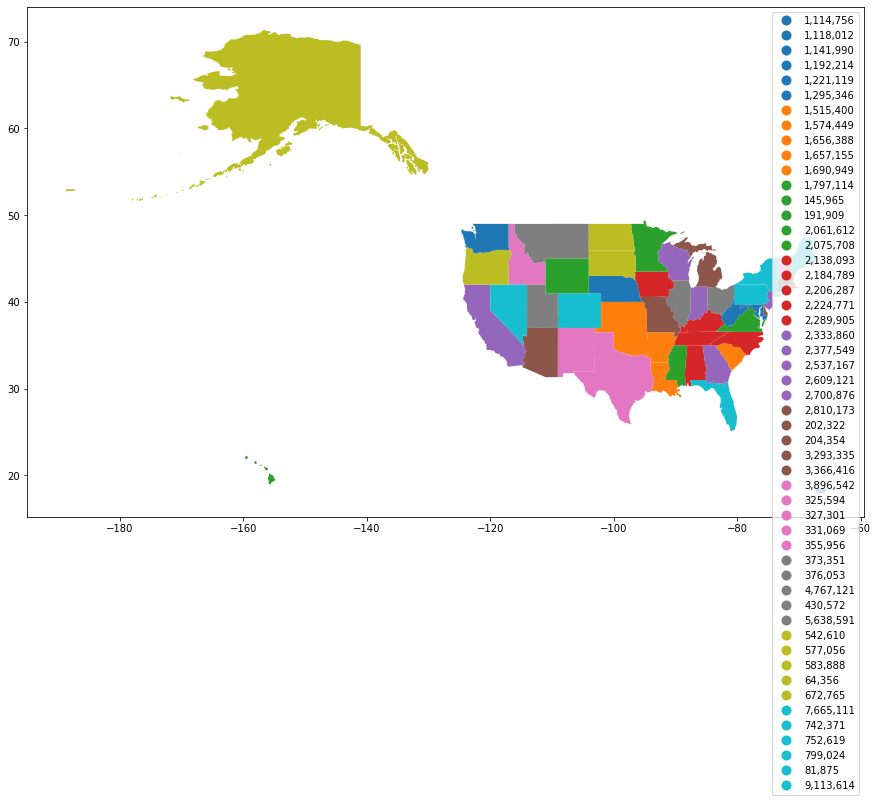

In [13]:
# get the data from the csv file, the cvs file is retrieved from this site
# read a cvs file located in internet
url = 'https://www2.census.gov/programs-surveys/decennial/2020/data/apportionment/apportionment.csv'
df = pd.read_csv(url)

# for the year 1910, filter the data, and color the states in the maps according to the 'Resident Population' column
# the more population, the darker the color
df_1910 = df[df['Year'] == 1910]
df_1910 = df_1910[['Name', 'Resident Population']]

# merge the data with the map
us_1910 = us.merge(df_1910, left_on='name', right_on='Name')
us_1910.plot(column='Resident Population', legend=True, figsize=(15, 10))
plt.show()
